## Importe de librerías

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold

## Carga de datasets

In [9]:
df = pd.read_csv('NB1300(generated_data).csv',encoding='utf-8')

In [10]:
df

,Time_Stamp,NB1300Vibracion1,NB1300Vibracion2,NB1300Vibracion3,NB1300Vibracion4,NB1300Vibracion5,NB1300Vibracion6,NB1300Prec,NB1300tGener,NB1300tCuarto,NB1300tBloque,NB1300tAmbien,NB1300hCuarto,NB1300tRuedaL,NB1300tEscobillas,NB1300PQA01CorrP,NB1300pqa01VoltP,NB1300EstadoFalla
0,10/3/2022 19:48,2.3,2.0,2.5,2.7,2.3,2.9,44.1,36.7,26.3,34.0,21.2,38.4,38.9,43.9,12.0,440.0,0
1,10/3/2022 19:48,1.8,2.1,2.7,2.5,2.6,2.3,40.2,32.0,27.9,36.0,14.7,27.4,35.4,40.5,12.9,439.4,0
2,10/3/2022 19:48,1.4,2.6,2.7,2.0,2.9,2.7,44.5,35.1,25.7,37.0,23.0,42.2,37.7,33.9,13.0,441.3,0
3,10/3/2022 19:48,1.0,2.7,2.6,2.1,2.1,2.0,37.9,32.8,27.5,46.7,17.6,36.9,38.0,37.3,12.4,443.4,0
4,10/3/2022 19:48,2.3,2.3,2.5,2.1,2.5,2.4,44.3,32.2,27.4,32.7,21.0,30.4,33.6,36.2,13.4,440.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,10/4/2022 19:48,2.1,2.2,2.7,2.5,2.7,2.4,37.9,37.7,24.8,46.4,19.4,38.2,44.0,35.4,13.5,441.3,0
86396,10/4/2022 19:48,2.8,2.9,2.3,2.0,2.2,2.5,42.8,38.1,27.6,41.2,16.3,22.3,34.6,33.9,12.5,437.9,0
86397,10/4/2022 19:48,1.5,2.8,2.7,2.3,2.8,2.4,42.4,32.3,24.2,33.0,13.4,37.9,40.1,39.5,12.6,444.8,0
86398,10/4/2022 19:48,1.0,2.7,2.6,2.5,2.8,2.6,39.5,34.5,24.0,33.7,15.6,27.5,35.0,47.8,12.0,439.3,0


### Identificamos el target y el resto de features:

In [11]:
TARGET = 'NB1300EstadoFalla'
x_cols = df.drop(columns=[TARGET,'Time_Stamp'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time_Stamp         86400 non-null  object 
 1   NB1300Vibracion1   86400 non-null  float64
 2   NB1300Vibracion2   86400 non-null  float64
 3   NB1300Vibracion3   86400 non-null  float64
 4   NB1300Vibracion4   86400 non-null  float64
 5   NB1300Vibracion5   86400 non-null  float64
 6   NB1300Vibracion6   86400 non-null  float64
 7   NB1300Prec         86400 non-null  float64
 8   NB1300tGener       86400 non-null  float64
 9   NB1300tCuarto      86400 non-null  float64
 10  NB1300tBloque      86400 non-null  float64
 11  NB1300tAmbien      86400 non-null  float64
 12  NB1300hCuarto      86400 non-null  float64
 13  NB1300tRuedaL      86400 non-null  float64
 14  NB1300tEscobillas  86400 non-null  float64
 15  NB1300PQA01CorrP   86400 non-null  float64
 16  NB1300pqa01VoltP   864

##### No hay valores nulos

In [13]:
df.describe()

,NB1300Vibracion1,NB1300Vibracion2,NB1300Vibracion3,NB1300Vibracion4,NB1300Vibracion5,NB1300Vibracion6,NB1300Prec,NB1300tGener,NB1300tCuarto,NB1300tBloque,NB1300tAmbien,NB1300hCuarto,NB1300tRuedaL,NB1300tEscobillas,NB1300PQA01CorrP,NB1300pqa01VoltP,NB1300EstadoFalla
count,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000
mean,1.966441,2.462409,2.462029,2.462078,2.461726,2.461628,41.017551,35.495927,25.462309,40.037678,18.506546,33.562777,40.014110,40.031647,12.961167,440.451635,0.006146
std,0.611703,0.335352,0.337146,0.334814,0.333022,0.335515,2.413559,2.065441,1.469801,4.712893,3.791987,6.761091,4.713925,4.714498,0.596242,7.739324,0.078155
min,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,37.000000,32.000000,23.000000,32.000000,12.000000,22.000000,32.000000,32.000000,12.000000,435.000000,0.000000
25%,1.500000,2.200000,2.200000,2.200000,2.200000,2.200000,39.000000,33.700000,24.200000,36.000000,15.200000,27.700000,35.900000,35.900000,12.500000,437.500000,0.000000
50%,2.000000,2.500000,2.500000,2.500000,2.500000,2.500000,41.000000,35.500000,25.400000,40.000000,18.500000,33.500000,40.000000,40.000000,13.000000,440.000000,0.000000
75%,2.500000,2.700000,2.700000,2.700000,2.700000,2.700000,43.000000,37.200000,26.700000,44.100000,21.800000,39.300000,44.100000,44.100000,13.500000,442.500000,0.000000
max,5.900000,5.900000,5.900000,5.900000,5.900000,5.900000,54.900000,43.900000,29.900000,55.900000,26.900000,54.900000,55.900000,55.900000,15.900000,599.600000,1.000000


In [14]:
df[df.duplicated() != False]

,Time_Stamp,NB1300Vibracion1,NB1300Vibracion2,NB1300Vibracion3,NB1300Vibracion4,NB1300Vibracion5,NB1300Vibracion6,NB1300Prec,NB1300tGener,NB1300tCuarto,NB1300tBloque,NB1300tAmbien,NB1300hCuarto,NB1300tRuedaL,NB1300tEscobillas,NB1300PQA01CorrP,NB1300pqa01VoltP,NB1300EstadoFalla


##### No hay valores duplicados

## Vemos la correlación que hay entre el target (NB1300EstadoFalla) y el resto de variables:

In [15]:
df.corr()['NB1300EstadoFalla']

NB1300Vibracion1     0.322653
NB1300Vibracion2     0.475240
NB1300Vibracion3     0.489403
NB1300Vibracion4     0.480638
NB1300Vibracion5     0.473035
NB1300Vibracion6     0.484815
NB1300Prec           0.291129
NB1300tGener         0.228257
NB1300tCuarto        0.188096
NB1300tBloque        0.201497
NB1300tAmbien        0.155414
NB1300hCuarto        0.191165
NB1300tRuedaL        0.197568
NB1300tEscobillas    0.197085
NB1300PQA01CorrP     0.265125
NB1300pqa01VoltP     0.809799
NB1300EstadoFalla    1.000000
Name: NB1300EstadoFalla, dtype: float64

### Graficamos dicha correlación:

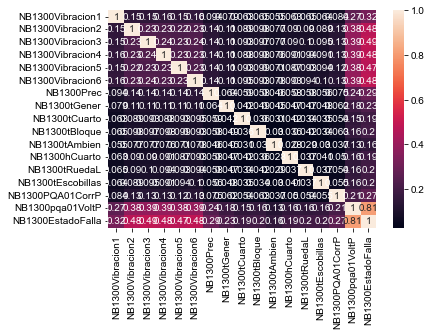

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(), annot=True)

#### Graficamos los features cuya correlación con respecto al target sea mayor a 0.3:

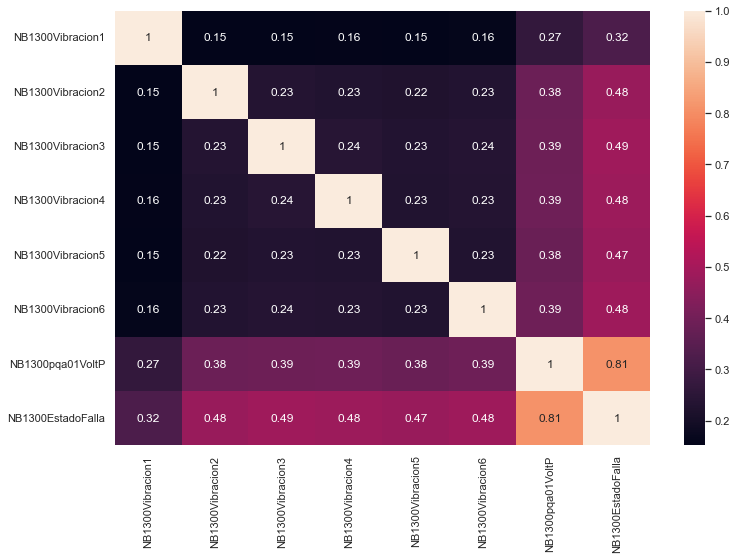

In [17]:
# Graficamos los features con una correlación mayor a 0.3:

features = df.corr()['NB1300EstadoFalla'][df.corr().NB1300EstadoFalla > 0.3].index.values
df_corr = df[features]
sns.heatmap(df_corr.corr(), annot=True)
sns.set(rc={'figure.figsize':(12,8)})

#### Notamos que las features con mayor correlación con respecto al target son las 6 vibraciones y pqa01VoltP (averiguar de qué es ese voltaje)

## Graficas de correlación (mayor a 0.3) individuales:

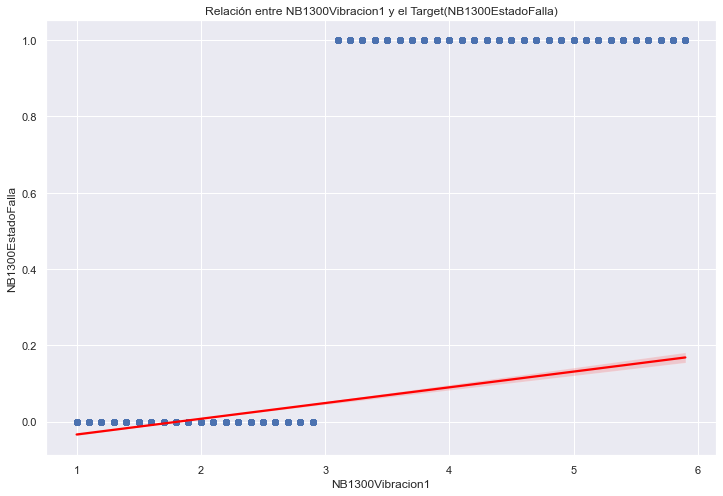

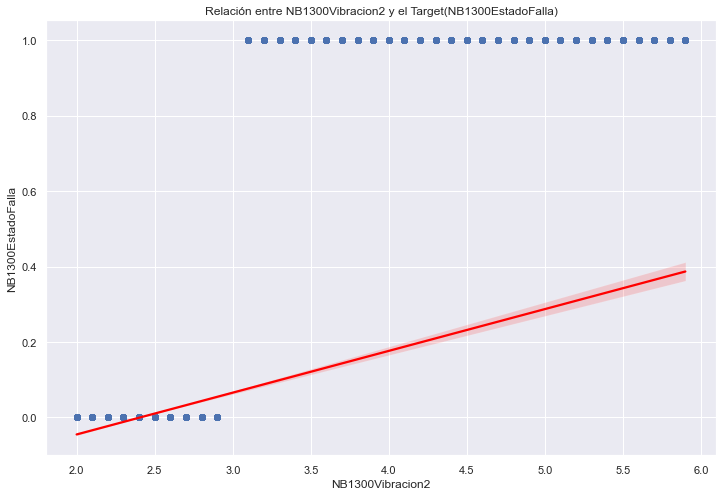

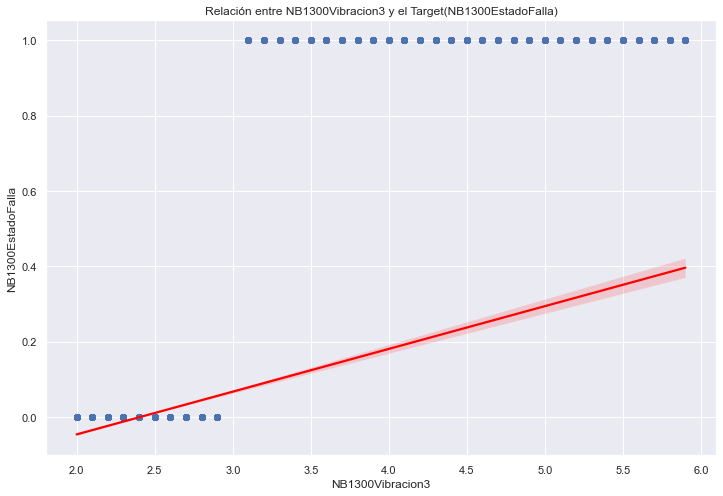

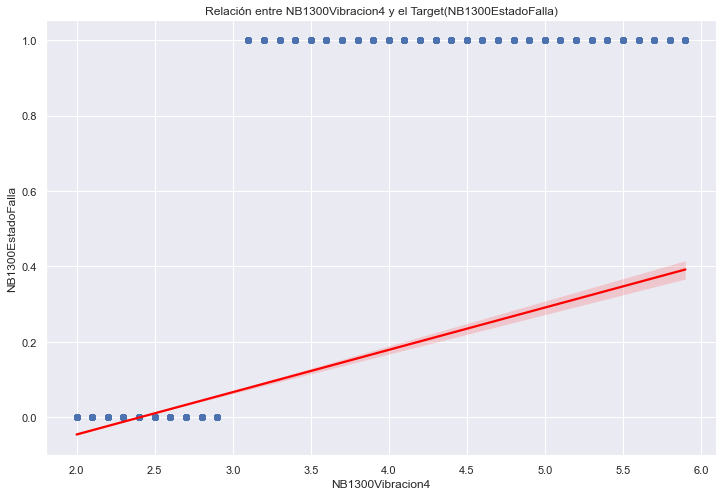

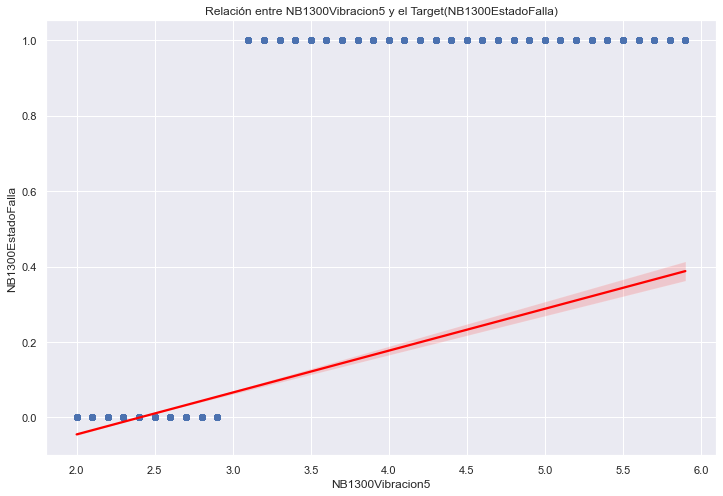

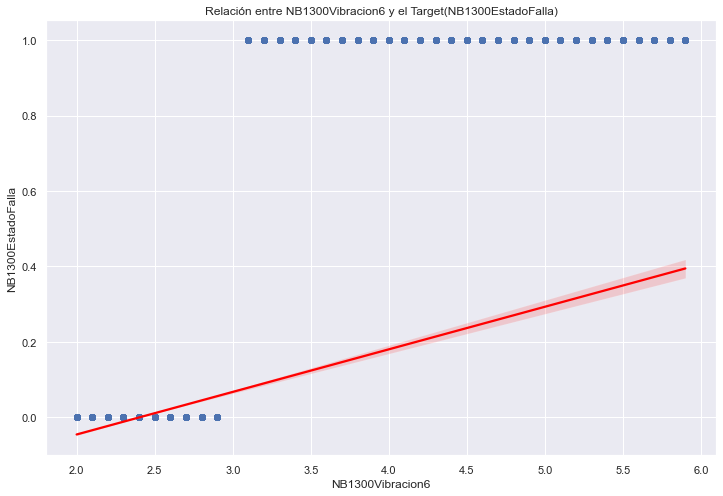

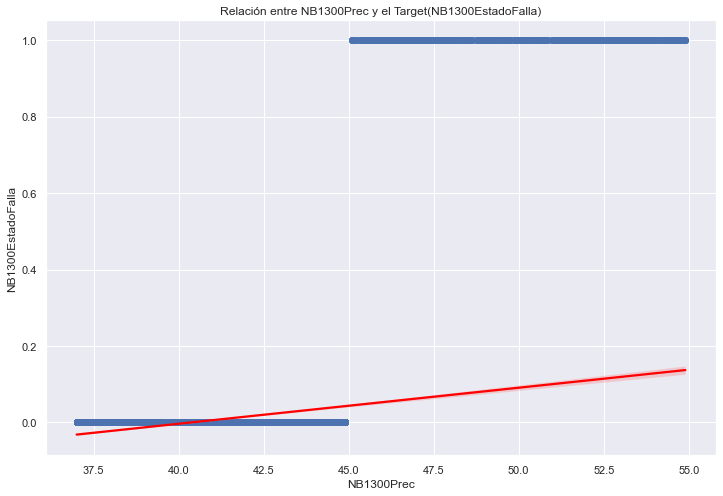

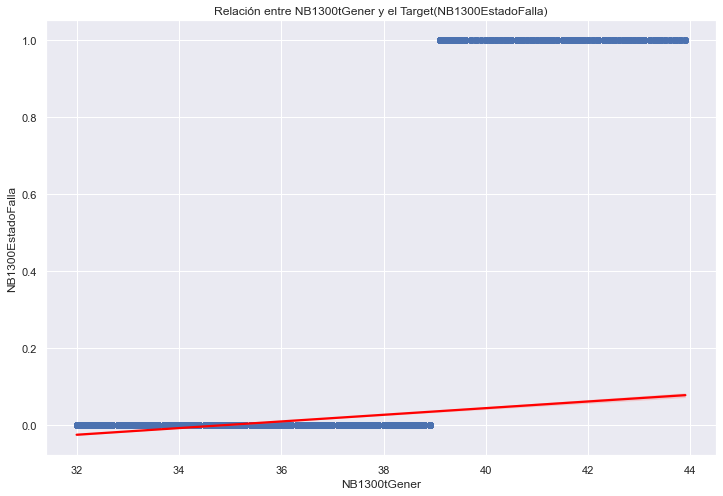

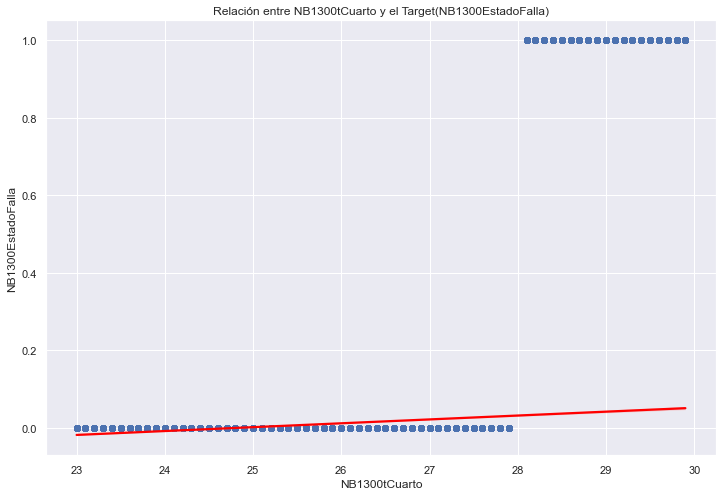

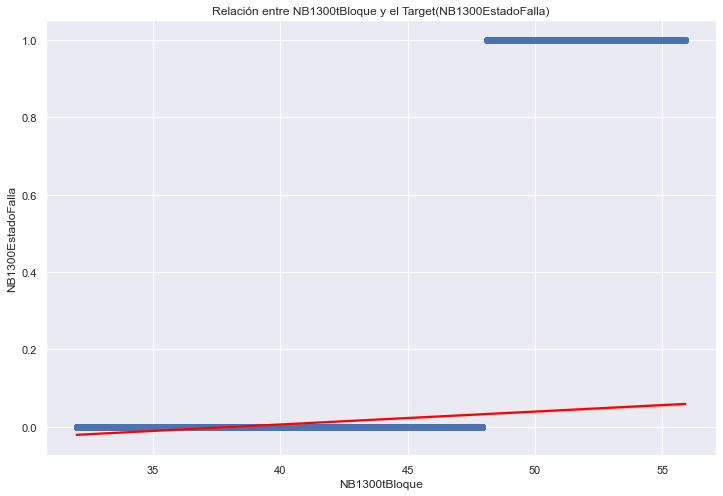

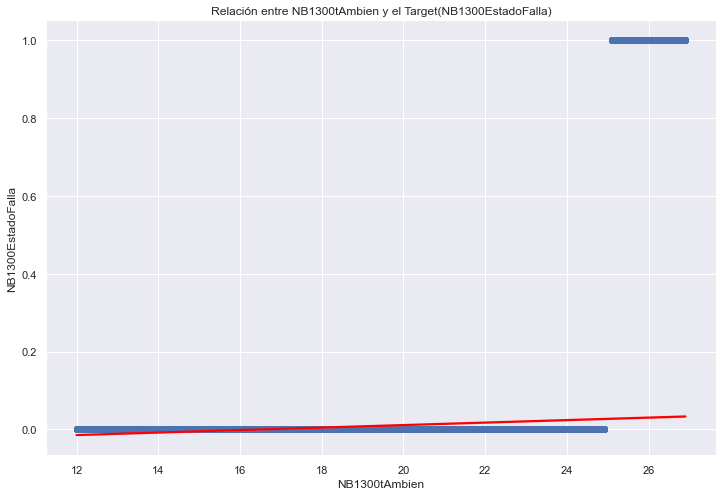

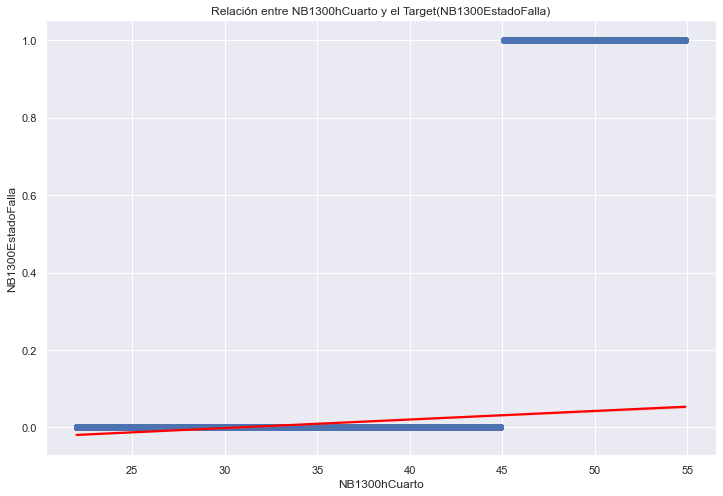

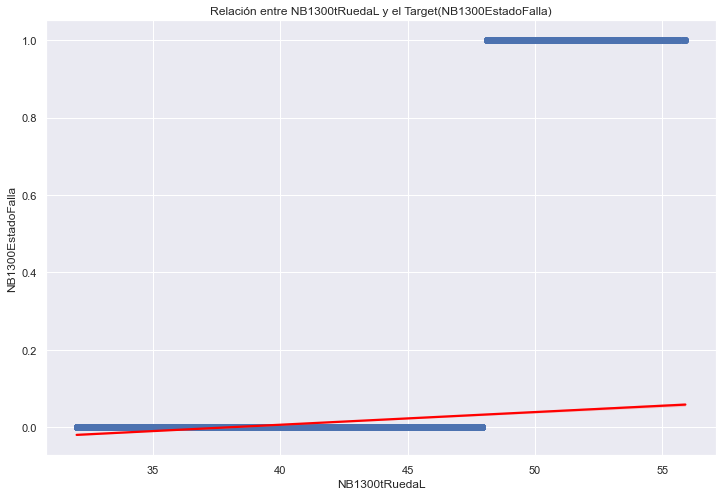

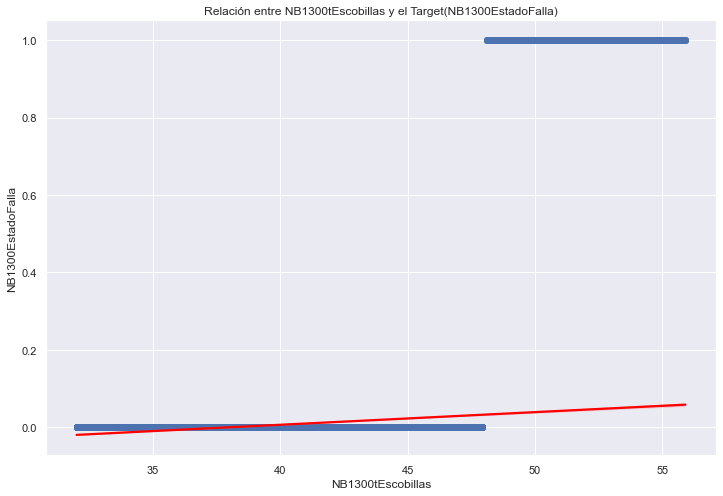

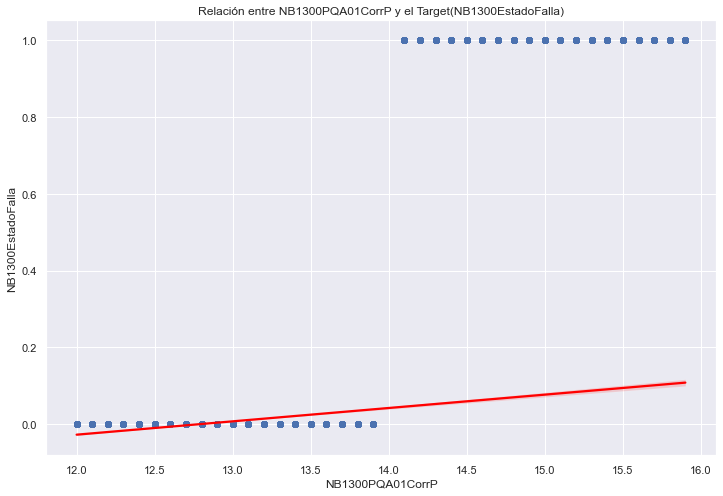

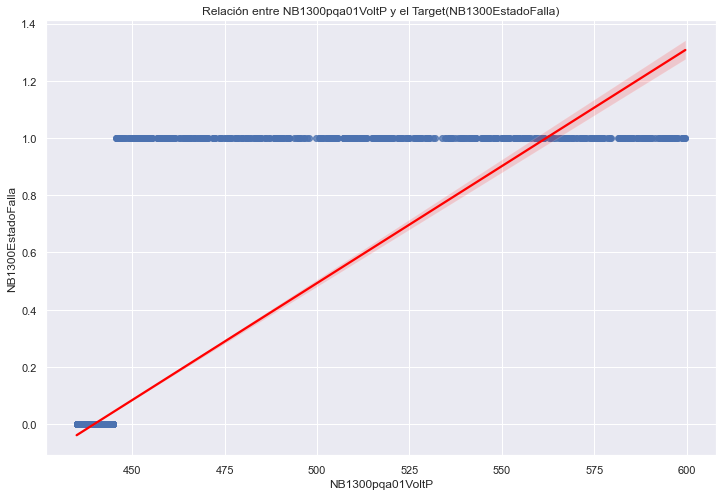

In [18]:
for col in x_cols:
    sns.regplot(x=col, y=TARGET, data=df,line_kws={"color": "red"})
    plt.title(f"Relación entre {col} y el Target({TARGET})")
    plt.show()

## Preparando los datos para entrenar el modelo:

##### Usando todas las features:

In [19]:
X = df.drop(columns=[TARGET,'Time_Stamp']).values
Y = df[TARGET].values

Instanciamos el KFold para hacer validación cruzada:

In [20]:
kf = KFold(n_splits=20,shuffle=True,random_state=50)

Instanciamos el el modelo Stochastic Gradient Descendet Classifier:

In [28]:
sdg = SGDClassifier(loss="hinge", penalty="l2", max_iter=300)

## Entrenamos el modelo haciendo validación cruzada:

In [29]:
for train_index,test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    sdg.fit(x_train,y_train)
    # prediccion = sdg.predict(x_test)

Hacemos la predicción los dato de testeo:

In [30]:
prediccion = sdg.predict(x_test)

Comparamos el resultado de la predicción con los datos reales:

In [31]:
df_comparacion_predicciones = pd.DataFrame({'y_test':y_test, 'prediccion':np.round(prediccion,2),'Diferencia':np.round(y_test-prediccion,2)})
df_comparacion_predicciones[df_comparacion_predicciones.y_test == 1].head(60)

,y_test,prediccion,Diferencia
697,1,1,0
763,1,1,0
1060,1,1,0
1088,1,1,0
1234,1,1,0
1279,1,1,0
1294,1,1,0
1330,1,1,0
1362,1,1,0
1764,1,1,0


## Testeo con nuevos datos ficticios:

In [32]:
df_test = pd.read_csv('NB1300(testeo).csv',encoding='utf-8')
y_test = df_test[TARGET].values
x_test = df_test.drop(columns=['Time_Stamp',TARGET]).values
prediccion = sdg.predict(x_test)

In [33]:
df_test[df_test[TARGET] == 1]

,Time_Stamp,NB1300Vibracion1,NB1300Vibracion2,NB1300Vibracion3,NB1300Vibracion4,NB1300Vibracion5,NB1300Vibracion6,NB1300Prec,NB1300tGener,NB1300tCuarto,NB1300tBloque,NB1300tAmbien,NB1300hCuarto,NB1300tRuedaL,NB1300tEscobillas,NB1300PQA01CorrP,NB1300pqa01VoltP,NB1300EstadoFalla
214,10/04/2022 16:44:13,5.9,4.1,5.1,3.1,4.5,3.9,48.3,40.0,28.5,53.9,26.7,49.4,54.4,50.0,14.5,510.6,1
233,10/04/2022 16:44:32,5.7,5.9,4.1,4.4,3.5,5.0,47.6,43.2,29.8,54.4,26.9,47.4,53.7,49.8,15.5,562.2,1
417,10/04/2022 16:47:36,4.3,4.2,4.9,4.1,5.6,5.1,50.0,39.2,28.5,53.7,26.2,54.5,51.3,49.7,14.2,574.1,1
451,10/04/2022 16:48:10,3.1,4.4,3.2,3.2,4.9,3.9,54.6,42.3,28.9,49.3,26.3,53.9,50.9,55.2,15.7,448.2,1
541,10/04/2022 16:49:40,5.9,5.0,5.7,5.6,4.0,4.0,50.5,41.3,29.9,55.9,26.8,48.0,53.6,50.3,15.8,508.3,1
718,10/04/2022 16:52:37,4.6,4.2,4.0,5.8,3.5,5.5,45.5,42.2,28.4,49.7,26.7,50.8,52.0,50.2,14.6,544.1,1


In [34]:
df_comparacion_predicciones = pd.DataFrame({'y_test':y_test, 'prediccion':np.round(prediccion,2),'Diferencia':np.round(y_test-prediccion,2)})
df_comparacion_predicciones[df_comparacion_predicciones.y_test == 1].head(60)

,y_test,prediccion,Diferencia
214,1,1,0
233,1,1,0
417,1,1,0
451,1,1,0
541,1,1,0
718,1,1,0
